## ARIMA Model

In [2]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [3]:
df = pd.read_csv(r"C:\Users\MsK_PC\360digiTMG\Data_Science\DS_TMT_Steel_Project\Client_data\12mm.csv")

In [4]:
df= df.drop(['t','t_square','log_Quantity','April','August','December','February','January','July','June','March','May','November','October','September'], axis=1)

In [5]:
df

,Date,dia,Quantity,Rate,Value
0,2017-04-03,12 MM,1.93,41200.00,79516.0
1,2017-04-04,12 MM,10.19,37976.19,555690.0
2,2017-04-06,12 MM,10.19,41500.00,555690.0
3,2017-04-06,12 MM,3.03,41000.00,124230.0
4,2017-04-07,12 MM,5.15,40800.00,210120.0
...,...,...,...,...,...
6552,2023-03-07,12 MM,9.98,61950.00,555690.0
6553,2023-03-10,12 MM,10.19,63200.00,555690.0
6554,2023-03-23,12 MM,2.09,60400.00,126236.0
6555,2023-03-25,12 MM,8.66,60000.00,519600.0


In [6]:
#'Quantity' column will have aggregated sums for the same date


# Assuming your data is stored in a DataFrame called 'df'
aggregated_df = df.groupby('Date')['Quantity'].sum().reset_index()

# 'aggregated_df' will contain the sum of quantities for each unique date in a single row

aggregated_df


,Date,Quantity
0,2017-04-03,1.93
1,2017-04-04,10.19
2,2017-04-06,13.22
3,2017-04-07,15.34
4,2017-04-08,15.29
...,...,...
1609,2023-03-25,16.10
1610,2023-03-28,11.17
1611,2023-03-29,5.18
1612,2023-03-30,25.49


In [7]:
# Data Partition
#Train = df.head(6545)
#Test = df.tail(12)

# Data Partition
Train = aggregated_df.iloc[:len(aggregated_df)-365]
Test = aggregated_df.iloc[len(aggregated_df)-365:]



In [8]:
Test

,Date,Quantity
1249,2021-12-07,9.22
1250,2021-12-08,8.36
1251,2021-12-09,13.92
1252,2021-12-10,25.07
1253,2021-12-11,3.45
...,...,...
1609,2023-03-25,16.10
1610,2023-03-28,11.17
1611,2023-03-29,5.18
1612,2023-03-30,25.49


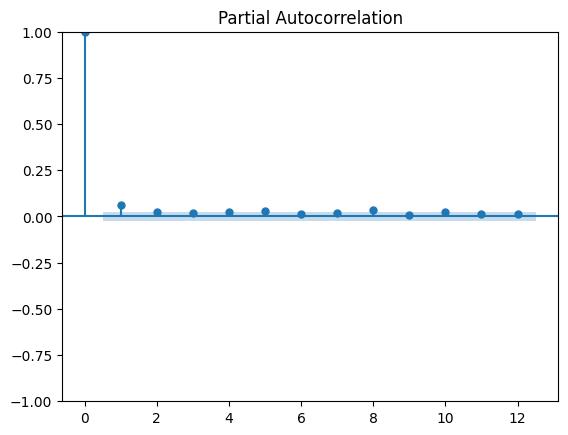

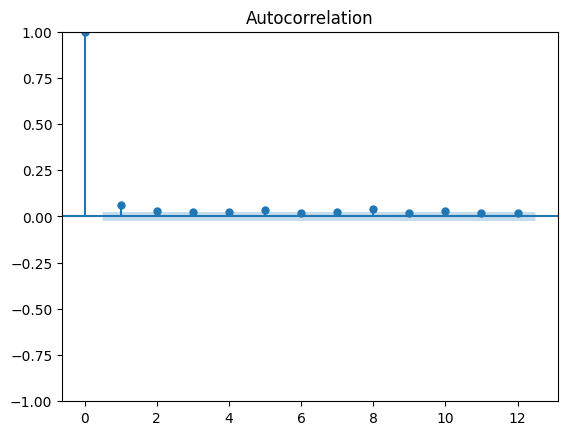

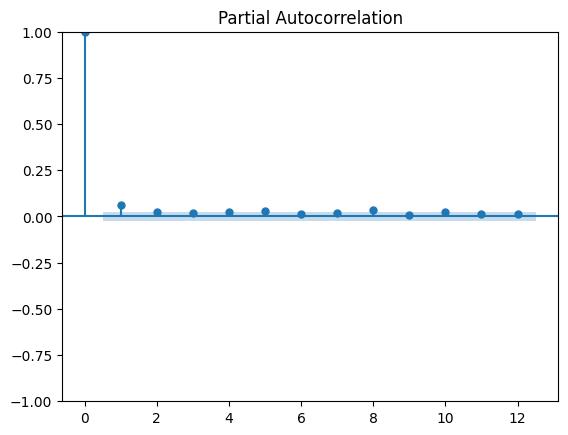

In [9]:
tsa_plots.plot_acf(df.Quantity, lags = 12)
tsa_plots.plot_pacf(df.Quantity, lags = 12)




In [10]:
# ARIMA with AR = 12, MA = 6
model1 = ARIMA(Train.Quantity, order = (12, 2, 3))
res1 = model1.fit()
print(res1.summary())


C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                 1249
Model:                ARIMA(12, 2, 3)   Log Likelihood               -4902.469
Date:                Fri, 01 Sep 2023   AIC                           9836.937
Time:                        17:05:44   BIC                           9918.993
Sample:                             0   HQIC                          9867.789
                               - 1249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.4629      0.107    -22.964      0.000      -2.673      -2.253
ar.L2         -2.7216      0.197    -13.803      0.000      -3.108      -2.335
ar.L3         -2.1401      0.175    -12.236      0.0

In [11]:
# Forecast for next 365 days
start_index = len(Train)
start_index
end_index = start_index + 364
forecast_test = res1.predict(start = start_index, end = end_index)

print(forecast_test)


1249    9.579847
1250    8.422287
1251    9.850326
1252    8.524736
1253    8.432910
          ...   
1609    7.699643
1610    7.696728
1611    7.693813
1612    7.690898
1613    7.687983
Name: predicted_mean, Length: 365, dtype: float64


In [12]:
# Evaluate forecasts
rmse_test = sqrt(mean_squared_error(Test.Quantity, forecast_test))
print('Test RMSE: %.3f' % rmse_test)



Test RMSE: 12.301


In [13]:
Test.Quantity

1249     9.22
1250     8.36
1251    13.92
1252    25.07
1253     3.45
        ...  
1609    16.10
1610    11.17
1611     5.18
1612    25.49
1613     9.15
Name: Quantity, Length: 365, dtype: float64

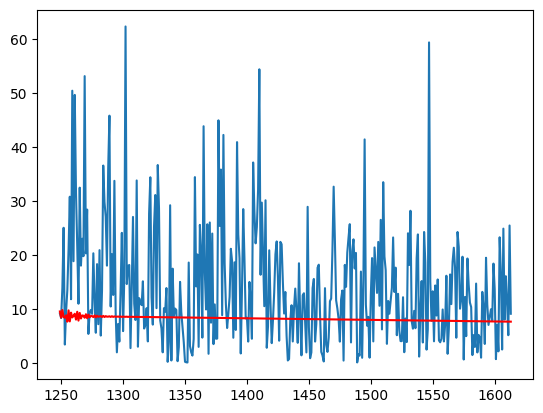

In [14]:
# plot forecasts against actual outcomes
pyplot.plot(Test.Quantity)
pyplot.plot(forecast_test, color = 'red')
pyplot.show()




In [15]:
# Auto-ARIMA - Automatically discover the optimal order for an ARIMA model.
# pip install pmdarima --user
import pmdarima as pm

#help(pm.auto_arima)

ar_model = pm.auto_arima(Train.Quantity, start_p = 0, start_q = 0,
                      max_p = 30, max_q = 12, # maximum p and q
                      m = 12,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = True,   # Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)




Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=10416.467, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10414.643, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10068.069, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9784.510, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10412.643, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=9784.890, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=9786.066, Time=1.58 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=9785.947, Time=2.90 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=9784.414, Time=0.71 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=9785.954, Time=2.25 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=9787.954, Time=2.68 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=10416.471, Time=0.19 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=9764.923, Time=1.65 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9763.088, Time=0.56 sec
 ARIMA(1,1,1)(

In [16]:
# Best Parameters ARIMA
model = ARIMA(Train.Quantity, order = (22, 1, 6))
res = model.fit()
print(res.summary())




C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                 1249
Model:                ARIMA(22, 1, 6)   Log Likelihood               -4852.936
Date:                Fri, 01 Sep 2023   AIC                           9763.872
Time:                        17:07:06   BIC                           9912.622
Sample:                             0   HQIC                          9819.797
                               - 1249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0617      0.170     -6.253      0.000      -1.395      -0.729
ar.L2         -1.2302      0.247     -4.982      0.000      -1.714      -0.746
ar.L3         -1.1028      0.249     -4.431      0.0

In [17]:
# Forecast for next 365 days
start_index = len(Train)
end_index = start_index + 364
forecast_best = res.predict(start = start_index, end = end_index)


print(forecast_best)



1249    10.734067
1250    15.935363
1251    13.015633
1252    17.034589
1253    14.747092
          ...    
1609    17.352638
1610    17.352655
1611    17.352638
1612    17.352651
1613    17.352642
Name: predicted_mean, Length: 365, dtype: float64


Test RMSE: 11.467


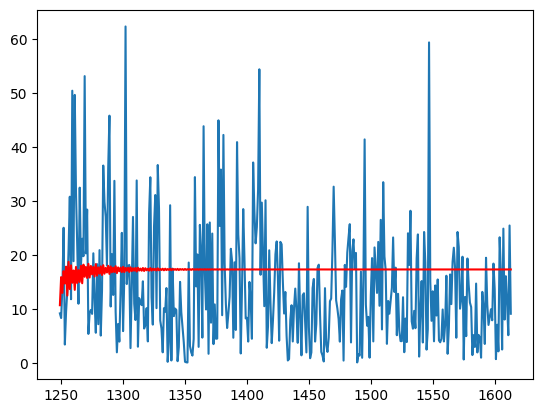

In [18]:
# Evaluate forecasts
rmse_best = sqrt(mean_squared_error(Test.Quantity, forecast_best))
print('Test RMSE: %.3f' % rmse_best)
# plot forecasts against actual outcomes
pyplot.plot(Test.Quantity)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()




In [19]:
from scipy.stats import ks_2samp
# Calculate Kolmogorov-Smirnov statistic for model drift detection
ks_statistic, ks_p_value = ks_2samp(Test['Quantity'], forecast_best)

# Define a threshold for significance level
threshold = 0.05

# Check for model drift based on p-value
model_drift_detected = ks_p_value < threshold
# Display model drift detection result
print("Model Drift Detected:", model_drift_detected)

Model Drift Detected: True
